# HD 22049

#### setup...

In [1]:
import sys, os
sys.path.append(os.path.join(os.path.abspath(''), ".."))
import numpy as np
from scripts.measure_peaks import measure_bfps, measure_bfp
from scripts.plotter import plot_periodograms, plot_monte_carlo

## Periodograms

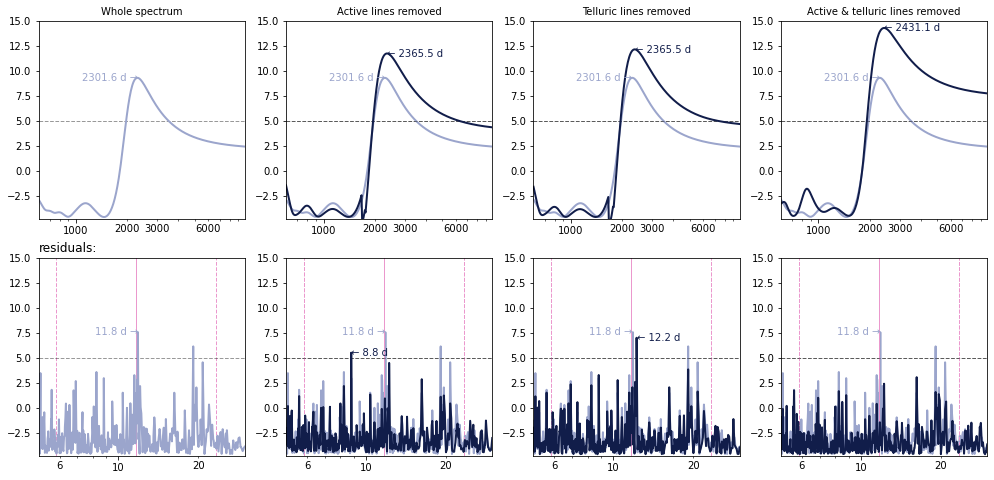

In [2]:
f, ax = plot_periodograms(hd=22049, rotation=11.68, nobs=104, range1=(600, 9900), range2=(5, 30), ylim=[-4.8, 15])

## Monte Carlo test

### Measure the signal peaks from BFPs

In [3]:
### Signal peaks to measure, format: list of (P, dP), where the signal location is P +/- dP
peaks1 = [(2600, 1000)] # from the original BFP
peaks2 = [(11.8, 1)]    # from the BFP of the residuals

### Number of RV mesurements in the data set
nobs = 104

# remeasure all the BFPs or not?
recompute = False
target = "../data/HD22049/monte-carlo/measurements.txt"
source = "../data/HD22049/monte-carlo/"

if not os.path.isfile(target) or recompute:
    measure_bfps(
        folder = source,
        saveto = target,
        prefix = "hd22049",
        nobs   = nobs,
        peaks1 = peaks1,
        peaks2 = peaks2
    )

### Plot the Monte Carlo sample

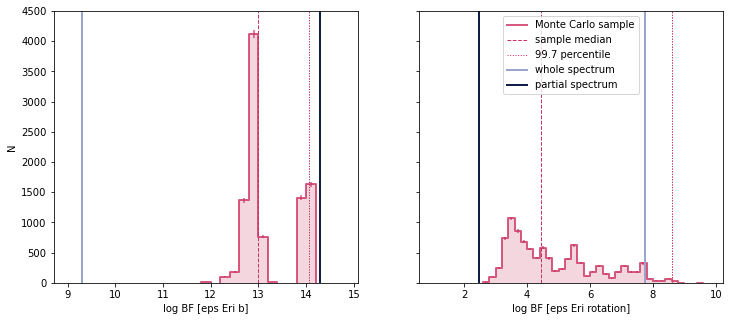

In [4]:
data = np.genfromtxt(target, names=True, delimiter="\t")
plot_monte_carlo(
    subsets=[data["bfp1_P2600_logbf"], data["bfp2_P11_logbf"]],
    labels=["log BF [eps Eri b]", "log BF [eps Eri rotation]"],
    bins=[np.arange(9, 15, 0.2), np.arange(1, 10, 0.2)],
    ylim=[0, 4500],
    whole_logbf=[9.299, 7.743],
    partial_logbf=[14.292, 2.457],
    mask=(data["bfp1_P2600_logbf"]<15)&(data["bfp2_P11_logbf"]>2)
)